In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

## ggplot 스타일
mpl.style.use('ggplot')
# matplotlib 한글화
mpl.rcParams['font.family'] = 'D2coding'

## 데이터 로딩

- 머신러닝을 돌리기 위해서는 데이터프레임을 넘파이배열로 바꾸어야 한다.

In [2]:
fish = pd.read_csv('C:/k_digital/source/data/fish.csv')
fish.sample(10)

,Species,Weight,Length,Diagonal,Height,Width
77,Perch,100.0,18.0,19.2,5.2224,3.3216
112,Perch,685.0,36.5,39.0,10.8810,6.8640
19,Bream,650.0,33.5,38.7,14.4738,5.7276
0,Bream,242.0,25.4,30.0,11.5200,4.0200
68,Parkki,145.0,21.5,24.1,9.7364,3.1571
89,Perch,135.0,22.0,23.5,5.8750,3.5250
83,Perch,115.0,21.0,22.5,5.9175,3.3075
136,Pike,540.0,43.0,45.8,7.7860,5.1296
82,Perch,110.0,21.0,22.5,5.6925,3.5550
8,Bream,450.0,30.0,35.1,14.0049,4.8438


In [3]:
fish['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [4]:
pd.unique(fish['Species'])

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [5]:
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() # numpy 배열로 변환

In [6]:
fish_input[:5]

array([[242.    ,  25.4   ,  30.    ,  11.52  ,   4.02  ],
       [290.    ,  26.3   ,  31.2   ,  12.48  ,   4.3056],
       [340.    ,  26.5   ,  31.1   ,  12.3778,   4.6961],
       [363.    ,  29.    ,  33.5   ,  12.73  ,   4.4555],
       [430.    ,  29.    ,  34.    ,  12.444 ,   5.134 ]])

In [7]:
fish_target = fish['Species'].to_numpy()

In [8]:
fish_target[:5]

array(['Bream', 'Bream', 'Bream', 'Bream', 'Bream'], dtype=object)

## 훈련세트와 테스트세트로 분리

In [9]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

## 피쳐 스케일링

In [10]:
# 분류에서는 score를 정확도
# 예측에서는 score를 R2결정계수
# 전처리에서는 fit(input데이터) - 표준화, transform - 데이터 반영

In [11]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input) # train_input에서 표준화할 데이터를 찾으면 test_input은 fit을 할 필요가 없다.
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

## k-최근접 이웃 분류기를 이용한 확률 예측

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_scaled, train_target)

print('훈련데이터의 점수 : {:.2f}'.format(knn.score(train_scaled, train_target)))
print('테스트데이터의 점수 : {:.2f}'.format(knn.score(test_scaled, test_target)))

훈련데이터의 점수 : 0.89
테스트데이터의 점수 : 0.85


In [13]:
 # 모델의 학습을 통해 새롭게 얻어진 변수(보통 '_'를 붙인다.)
knn.classes_ 

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [14]:
# 테스트 데이터에서 5개만 예측
knn.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Perch', 'Perch'], dtype=object)

In [15]:
# predict_proba() : 클래스별 확률값을 반환해주는 메서드
proba = knn.predict_proba(test_scaled[:5])

# decimals : 유지할 소수점 자리수
np.round(proba, decimals = 4) 

#'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish' 중에 하나가 될 확률이 출력

array([[0.    , 0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 1.    , 0.    ],
       [0.    , 0.    , 0.    , 1.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ],
       [0.    , 0.    , 0.6667, 0.    , 0.3333, 0.    , 0.    ]])

In [16]:
distances, indexs = knn.kneighbors(test_scaled[3:4])
train_target[indexs]

array([['Roach', 'Perch', 'Perch']], dtype=object)

## 로지스틱 회귀
- 대표적인 분류 알고리즘
- 인공신경망의 기본이 되는 알고리즘
- 선형회귀와 비슷하게 선형 방정식을 학습하는 알고리즘이다. 

### 로지스틱 회귀(이진 분류)

In [17]:
arr = np.array(['A', 'B', 'C', 'D', 'E'])
# boolean indexing
boolean = [True, False, True, False, False]
arr[boolean]

array(['A', 'C'], dtype='<U1')

In [18]:
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


In [19]:
print(train_input.shape, train_target.shape, test_input.shape, test_target.shape)

(119, 5) (119,) (40, 5) (40,)


In [20]:
# Bream, Smelt 데이터만 이용한 이진분류 학습
# Boolean Indexing
indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train = train_scaled[indexes]
target = train_target[indexes]

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train, target)

LogisticRegression()

In [22]:
lr.predict(train[:5])

array(['Bream', 'Smelt', 'Bream', 'Bream', 'Bream'], dtype=object)

In [23]:
# 예측 클래스
lr.classes_

array(['Bream', 'Smelt'], dtype=object)

In [24]:
# 예측확률
lr.predict_proba(train[:5])
# 'Bream', 'Smelt'
#  '음성',  '양성'

array([[0.99759855, 0.00240145],
       [0.02735183, 0.97264817],
       [0.99486072, 0.00513928],
       [0.98584202, 0.01415798],
       [0.99767269, 0.00232731]])

In [25]:
fish.keys()

Index(['Species', 'Weight', 'Length', 'Diagonal', 'Height', 'Width'], dtype='object')

In [26]:
print('회귀계수 : {}'.format(lr.coef_), 
      '\n절편 : {}'.format(lr.intercept_),
      '\n회귀방정식 : {:.3f} x Weight + {:.3f} x Length + {:.3f} x Diagonal + {:.3f} x Height + {:.3f} x Width + {:.3f}'.format(
          lr.coef_[0, 0], lr.coef_[0, 1], lr.coef_[0, 2], lr.coef_[0, 3], lr.coef_[0, 4], lr.intercept_[0]))

회귀계수 : [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] 
절편 : [-2.16155132] 
회귀방정식 : -0.404 x Weight + -0.576 x Length + -0.663 x Diagonal + -1.013 x Height + -0.732 x Width + -2.162


In [27]:
lr.coef_[0, 0]

-0.4037797979636808

In [28]:
# z값 계산
decisions = lr.decision_function(train[:10])
decisions

array([-6.02927744,  3.57123907, -5.26568906, -4.24321775, -6.0607117 ,
        3.41171526, -3.58936263, -7.66849569, -4.31680801, -2.22303129])

In [29]:
# 시그모이드 함수를 통해 확률값 추출
from scipy.special import expit

# 양성일 확률(smelt일 확률)
expit(decisions)

# 음성일 확률(Bream일 확률)
1 - expit(decisions)

array([0.99759855, 0.02735183, 0.99486072, 0.98584202, 0.99767269,
       0.03193133, 0.97312622, 0.9995329 , 0.98683327, 0.90229875])

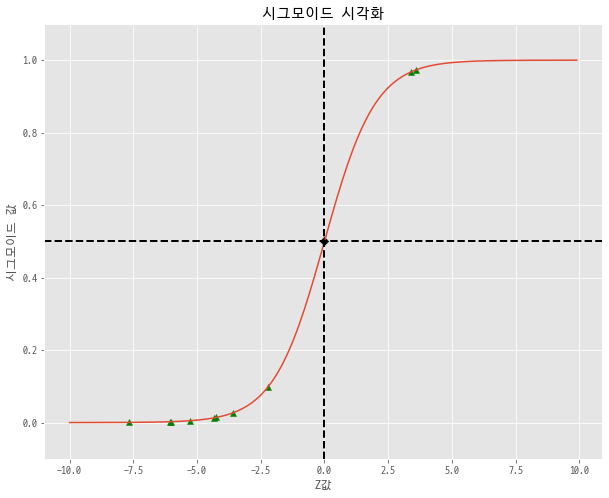

In [71]:
# 시그모이드 함수 시각화
def sigmoid(x):
    return 1 / (1+np.exp(-x))

x_data = np.arange(-10, 10, 0.1)
result = sigmoid(x_data)
plt.figure(figsize=(10, 8))
plt.plot(x_data, result)
plt.scatter(decisions, expit(decisions), marker='^' ,color = 'g')
plt.scatter(0, 0.5, marker = 'D', color = 'black')
plt.axhline(0.5, color='black', linestyle='--', linewidth=2)
plt.axvline(0, 0, 1, color='black', linestyle='--', linewidth=2)
plt.title('시그모이드 시각화')
plt.xlabel('Z값')
plt.ylabel('시그모이드 값')
plt.ylim(-0.1, 1.1)
plt.show()

### 로지스틱 회귀(다중 분류)

In [54]:
from sklearn.linear_model import LogisticRegression
# 규제 C = 1 / alpha
# max_iter : 반복횟수
lr = LogisticRegression(C = 20, max_iter = 1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


In [59]:
lr.classes_

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [55]:
lr.predict(test_scaled[:5])

array(['Perch', 'Smelt', 'Pike', 'Roach', 'Perch'], dtype=object)

In [58]:
proba = lr.predict_proba(test_scaled[:5])
np.round(proba, decimals = 3)
# 'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'

array([[0.   , 0.014, 0.841, 0.   , 0.136, 0.007, 0.003],
       [0.   , 0.003, 0.044, 0.   , 0.007, 0.946, 0.   ],
       [0.   , 0.   , 0.034, 0.935, 0.015, 0.016, 0.   ],
       [0.011, 0.034, 0.306, 0.007, 0.567, 0.   , 0.076],
       [0.   , 0.   , 0.904, 0.002, 0.089, 0.002, 0.001]])